In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

# Third Party Modules
import torch.optim as optim
import torch
import torch.nn as nn

# Local Modules
from src.training import build_dataset, train_model

# Path to Dataset
DATA_DIR = "/media/gabriel/500 BKP/datasets/VOICES-DataSet/preprocessed"

# Dataset and loader
train_dataset, train_loader = build_dataset(DATA_DIR, split='train', target_frames=1024, batch_size = 24)
val_dataset, val_loader = build_dataset(DATA_DIR, split='test', target_frames=1024, batch_size = 24)

/home/gabriel/miniconda3/envs/venv_audio/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda

🔁 Epoch 1/100


✅ Best model saved (val loss: 1.5926)

🎧 Previewing model output at epoch 0:


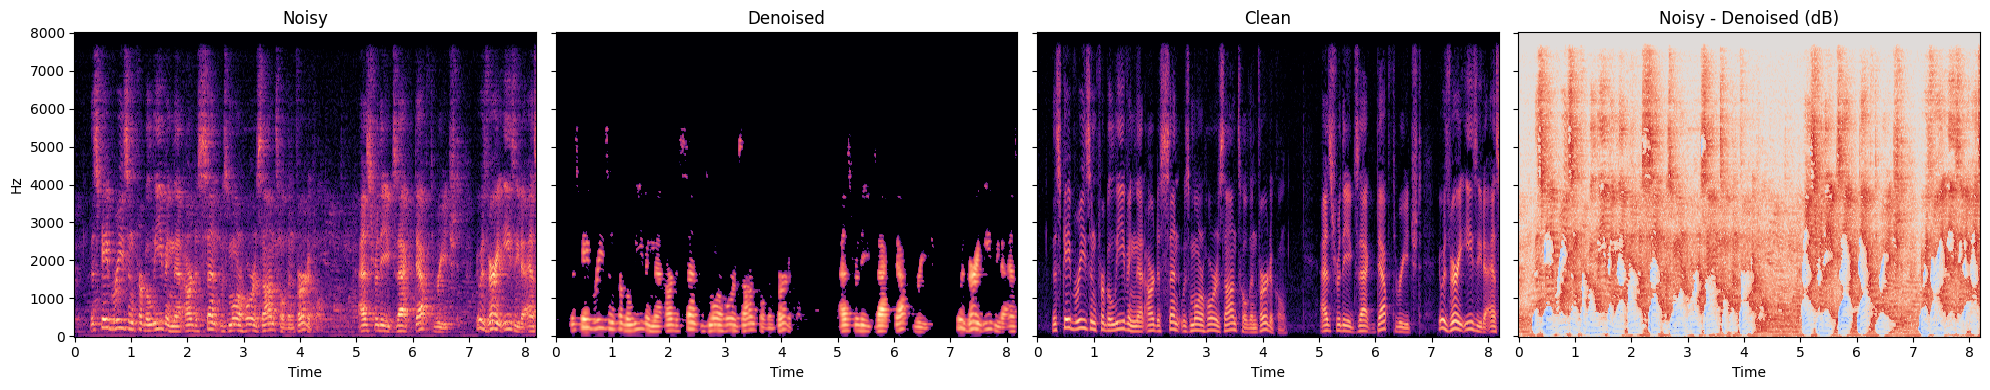

🔊 Noisy


🔊 Denoised (model output)


🔊 Clean (reference)


📉 Train Loss: 1.6834 | Val Loss: 1.5926
🔧 Learning Rate: 0.001000

🔁 Epoch 2/100


✅ Best model saved (val loss: 1.5078)
📉 Train Loss: 1.3222 | Val Loss: 1.5078
🔧 Learning Rate: 0.001000

🔁 Epoch 3/100


⚠️  No improvement for 1 epoch(s)
📉 Train Loss: 1.2237 | Val Loss: 1.6843
🔧 Learning Rate: 0.001000

🔁 Epoch 4/100


✅ Best model saved (val loss: 1.3350)
📉 Train Loss: 1.1920 | Val Loss: 1.3350
🔧 Learning Rate: 0.001000

🔁 Epoch 5/100


✅ Best model saved (val loss: 1.2484)
📉 Train Loss: 1.1605 | Val Loss: 1.2484
🔧 Learning Rate: 0.001000

🔁 Epoch 6/100


⚠️  No improvement for 1 epoch(s)
📉 Train Loss: 1.1335 | Val Loss: 1.3077
🔧 Learning Rate: 0.001000

🔁 Epoch 7/100


Epoch 00007: reducing learning rate of group 0 to 2.0000e-04.
⚠️  No improvement for 2 epoch(s)
📉 Train Loss: 1.1286 | Val Loss: 1.5007
🔧 Learning Rate: 0.000200

🔁 Epoch 8/100


⚠️  No improvement for 3 epoch(s)
📉 Train Loss: 1.1093 | Val Loss: 1.3814
🔧 Learning Rate: 0.000200

🔁 Epoch 9/100


Epoch 00009: reducing learning rate of group 0 to 4.0000e-05.
⚠️  No improvement for 4 epoch(s)
📉 Train Loss: 1.0935 | Val Loss: 1.3248
🔧 Learning Rate: 0.000040

🔁 Epoch 10/100


⚠️  No improvement for 5 epoch(s)
📉 Train Loss: 1.0791 | Val Loss: 1.3206
🔧 Learning Rate: 0.000040

🔁 Epoch 11/100


Epoch 00011: reducing learning rate of group 0 to 8.0000e-06.
⚠️  No improvement for 6 epoch(s)

🎧 Previewing model output at epoch 10:


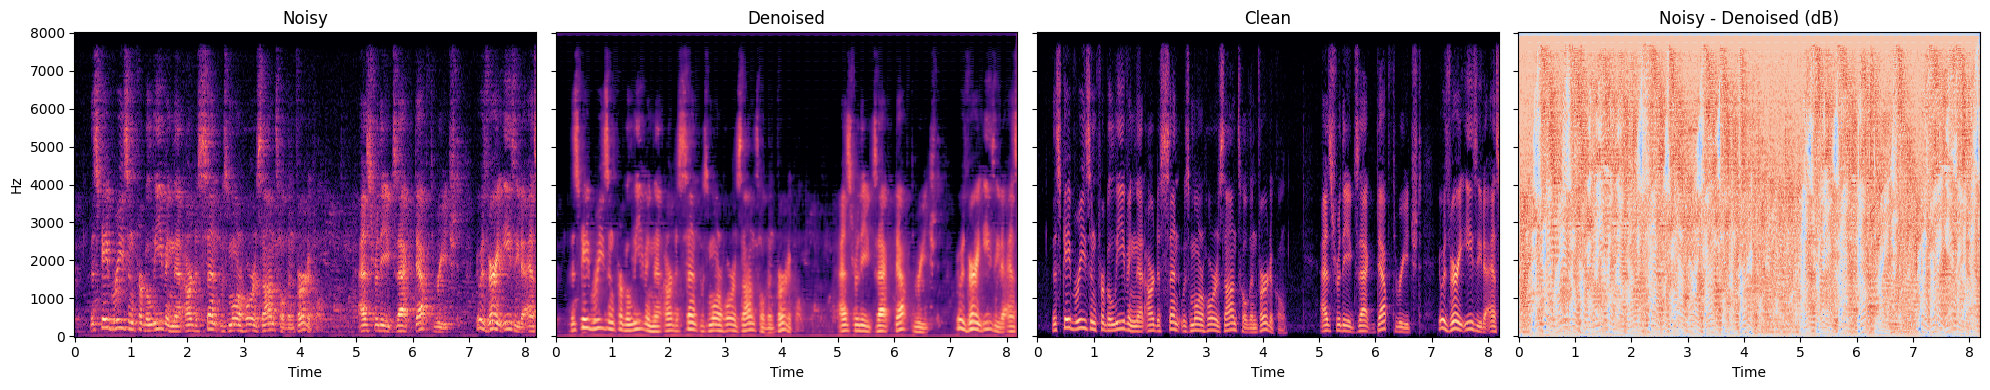

🔊 Noisy


🔊 Denoised (model output)


🔊 Clean (reference)


📉 Train Loss: 1.0960 | Val Loss: 1.3015
🔧 Learning Rate: 0.000008

🔁 Epoch 12/100


⚠️  No improvement for 7 epoch(s)
📉 Train Loss: 1.0751 | Val Loss: 1.3164
🔧 Learning Rate: 0.000008

🔁 Epoch 13/100


Epoch 00013: reducing learning rate of group 0 to 1.6000e-06.
⚠️  No improvement for 8 epoch(s)
📉 Train Loss: 1.0806 | Val Loss: 1.3131
🔧 Learning Rate: 0.000002

🔁 Epoch 14/100


⚠️  No improvement for 9 epoch(s)
📉 Train Loss: 1.0842 | Val Loss: 1.3202
🔧 Learning Rate: 0.000002

🔁 Epoch 15/100


Epoch 00015: reducing learning rate of group 0 to 3.2000e-07.
⚠️  No improvement for 10 epoch(s)
⛔️ Early stopping triggered.


In [5]:
import torch
from torch import nn, optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from src.model_unet import UNet

# Step 1: Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Step 2: Create model and move to device
model = UNet(dropout_rate = 0.25).to(device)

# Step 3: Set up optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# Step 4: Set up learning rate scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',            # we're minimizing val loss
    factor=0.2,            # reduce LR by this factor (e.g. halve it)
    patience=1,            # wait this many epochs before reducing
    verbose=True           # print update info
)

# Step 5: Call training loop
model, train_losses, val_losses = train_model(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    device=device,
    train_loader=train_loader,
    train_dataset=train_dataset,
    val_loader=val_loader,
    val_dataset=val_dataset,
    num_epochs=100,
    early_stopping_patience=10,
    audio_preview=True
)

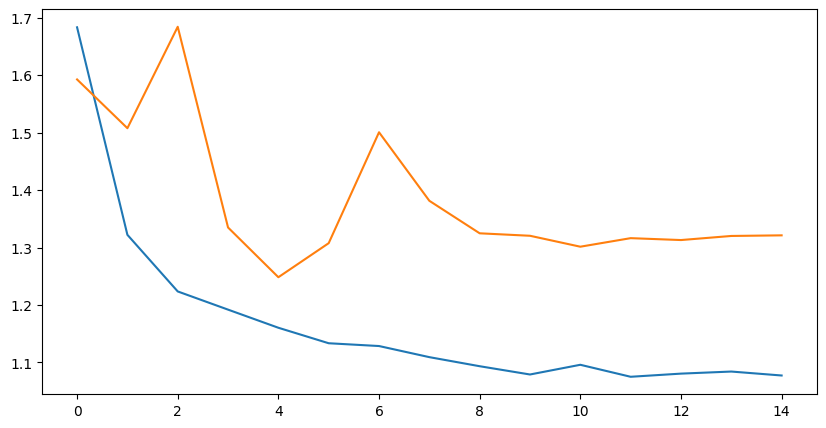

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')

In [49]:
from src.utils import play_denoised_sample, plot_spectrograms

play_denoised_sample(model, val_dataset, index=0)

🔊 Noisy


🔊 Denoised (model output)


🔊 Clean (reference)


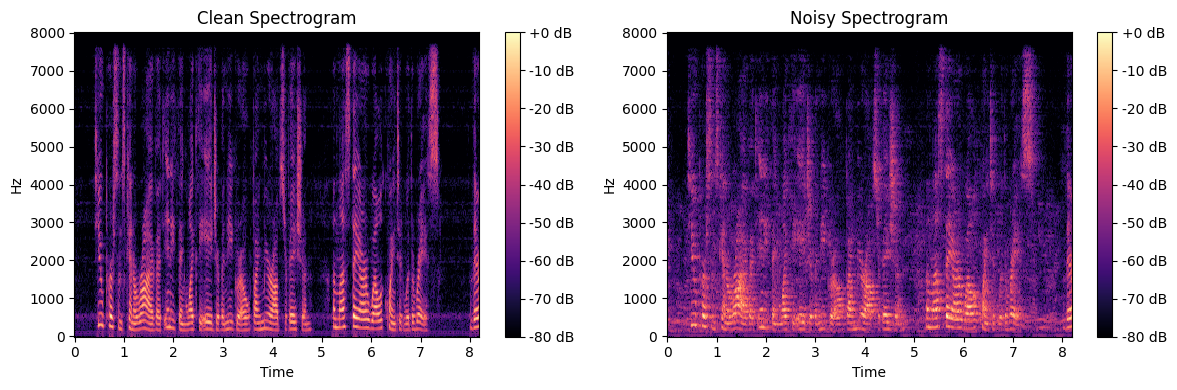

In [52]:
import librosa

plot_spectrograms(val_dataset[0][1], val_dataset[0][0])